<a href="https://colab.research.google.com/github/zhaixuejun1993/LinearRegression-Study/blob/main/Hello_Minist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from matplotlib import pyplot as plt

def plot_curve(data):
  fig = plt.figure()
  plt.plot(range(len(data)), data, color='blue')
  plt.legend(['value'], loc='upper right')
  plt.xlabel('step')
  plt.ylabel('value')
  plt.show()

def plot_image(img, label, name):
  fig = plt.figure()
  for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.tight_layout()
    plt.imshow(img[i][0] * 0.3081 + 0.1307, cmap='gray', interpolation='none')
    plt.title("{}: {}".format(name, label[i].item()))
    plt.xticks([])
    plt.yticks([])
  plt.show()

def one_hot(label, depth=10):
  out = torch.zeros(label.size(0), depth)
  idx = torch.LongTensor(label).view(-1, 1)
  out.scatter_(dim=1, index=idx, value=1)
  return out

torch.Size([512, 1, 28, 28]) torch.Size([512])


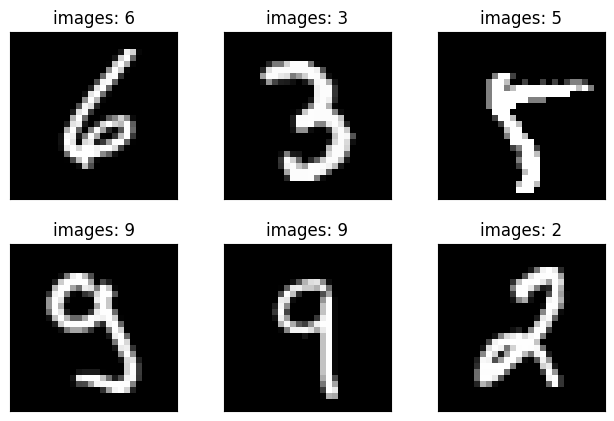

In [ ]:
from torch import nn
from torch.nn import functional as F
from torch import optim
import torchvision
import torchvision.transforms as transforms

# step1. load dataset
batch_size = 512
# Define the transform to apply to the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.1307,), (0.3081,))])

# Download the MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./minist_data',
                                           train=True,
                                           download=True,
                                           transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./minist_data',
                                          train=False,
                                          download=True,
                                          transform=transform)

# Create data loaders for the train and test sets
train_loader = torch.utils.data.DataLoader(train_dataset,
                                         batch_size=batch_size,
                                         shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset,
                                        batch_size=batch_size,
                                        shuffle=True)
sample = next(iter(train_loader))
print(sample[0].shape, sample[1].shape)
plot_image(sample[0], sample[1], 'images')

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(28 * 28, 256)
    self.fc2 = nn.Linear(256, 64)
    self.fc3 = nn.Linear(64, 10)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

Train Epoch: 0 0 tLoss: 0.116840
Train Epoch: 0 10 tLoss: 0.093214
Train Epoch: 0 20 tLoss: 0.083421
Train Epoch: 0 30 tLoss: 0.077050
Train Epoch: 0 40 tLoss: 0.072752
Train Epoch: 0 50 tLoss: 0.068678
Train Epoch: 0 60 tLoss: 0.064536
Train Epoch: 0 70 tLoss: 0.062600
Train Epoch: 0 80 tLoss: 0.057704
Train Epoch: 0 90 tLoss: 0.058622
Train Epoch: 0 100 tLoss: 0.056161
Train Epoch: 0 110 tLoss: 0.053733
Train Epoch: 1 0 tLoss: 0.051668
Train Epoch: 1 10 tLoss: 0.050573
Train Epoch: 1 20 tLoss: 0.047428
Train Epoch: 1 30 tLoss: 0.047616
Train Epoch: 1 40 tLoss: 0.046641
Train Epoch: 1 50 tLoss: 0.045258
Train Epoch: 1 60 tLoss: 0.042655
Train Epoch: 1 70 tLoss: 0.041566
Train Epoch: 1 80 tLoss: 0.041703
Train Epoch: 1 90 tLoss: 0.039623
Train Epoch: 1 100 tLoss: 0.041276
Train Epoch: 1 110 tLoss: 0.037502
Train Epoch: 2 0 tLoss: 0.038111
Train Epoch: 2 10 tLoss: 0.037756
Train Epoch: 2 20 tLoss: 0.036794
Train Epoch: 2 30 tLoss: 0.035229
Train Epoch: 2 40 tLoss: 0.036536
Train Epoch: 

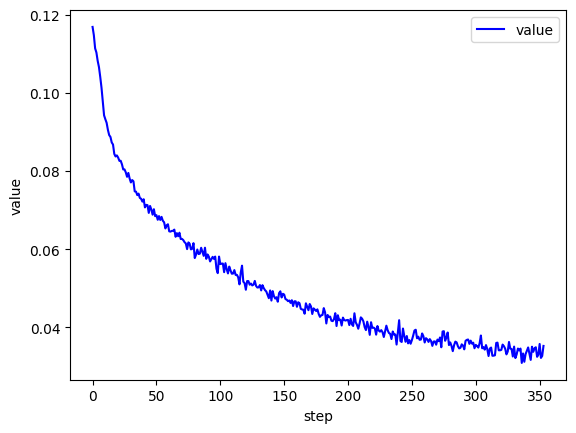

In [ ]:
net = Net()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
train_loss = []
for epoch in range(3):
  for batch_idx, (data, target) in enumerate(train_loader):
    data = data.view(-1, 28 * 28)
    out = net(data)
    y_onehot = one_hot(target)
    loss = F.mse_loss(out, y_onehot)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_loss.append(loss.item())

    if batch_idx % 10 == 0:
      print('Train Epoch: {} {} tLoss: {:.6f}'.format(
        epoch, batch_idx, loss.item()))

plot_curve(train_loss)

In [ ]:
total_correct = 0
for batch_idx, (data, target) in enumerate(test_loader):
  data = data.view(-1, 28 * 28)
  out = net(data)
  pred = out.argmax(dim=1)
  correct = pred.eq(target.view_as(pred)).sum().float().item()
  total_correct += correct

total_num = len(test_loader.dataset)
acc = total_correct / total_num
print("test acc:", acc)

test acc: 0.8849
